## 数据应用学院 
## Data Scientist Program 
## Quiz for Supervised Learning: Classification

In [1]:
import pandas as pd
from pyconnect.spark import SparkCluster
sparkcluster = SparkCluster().getOrCreate("myAppName")

SparkSession is created.
Check http://xhadrevrm13p.aetna.com:9998 for spark job UI
Note: might not work if the port is already used by others.

The application ID for the spark job is application_1541353470169_221686
If you exist without stopping the spark session, use the following command to kill the job:
yarn application -kill application_1541353470169_221686


In [2]:
spark = sparkcluster.session

In [8]:
alpha  =  spark.sql("""
 select
 round(alpha,1) as alpha,
avg(lift) as lift
from 
dev_cebc_enc.med_2_composite_score_3decile
group by round(alpha,1)
limit 10
""").toPandas()

In [10]:
alpha.head()

,alpha,lift
0,0.0,0.058706
1,0.2,0.096467
2,0.7,0.108797
3,0.1,0.069833
4,1.0,0.106275


In [73]:
import pandas as pd
path = 'diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

#### Have a look of the head of your data and define X and y

In [75]:
pima = pima.iloc[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [76]:
pima.shape

(768, 9)

In [77]:
## Define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label


#### 1. Split X and y into training and testing data

In [78]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
## Type Your Answer Below ##\n",
## hint: use sklearn package to do this ##\n"

In [88]:
 # split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(576, 4) (576,)
(192, 4) (192,)


#### 2. Train a logistic regression model on the training set

In [89]:
## Type Your Answer Below ##
# fit a model
lm = LogisticRegression()
model = lm.fit(X_train, y_train)

In [90]:
## Make class prediction for the testing set ##
y_pred = lm.predict(X_test)

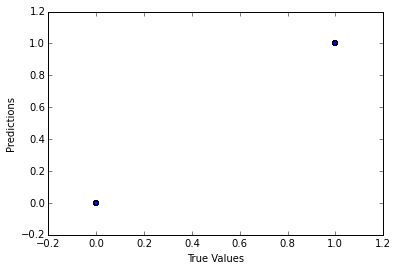

In [71]:
from matplotlib import pyplot as plt

%matplotlib inline
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### 3. Calculate metrics classification accuracy

**Classification accuracy**: percentage of correct predictions

In [91]:
## Type Your Answer Below ##
metrics.classification.accuracy_score(y_test,y_pred)

0.69270833333333337

In [92]:
from sklearn import metrics

#### 4.Draw the confusion matrix. 

In [93]:
## Type Your Answer Below ##
## IMPORTANT: first argument is true values, second argument is predicted values ##

In [94]:
metrics.classification.confusion_matrix(y_test,y_pred)


array([[118,  12],
       [ 47,  15]])

#### 5. Print the first 10 predicted responses

In [95]:
## Type Your Answer Below ##
y_pred[:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

#### 6. Print the first 10 predicted probabilities of class membership

In [96]:
## Type Your Answer Below ##
lm.predict_proba(X_test)[0:10,:]
# each row is one obseraction , each oclumn is one class 
# left column (class 0), right column (class1)

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

#### 7. Print the first 10 predicted probabilities for class 1 and store it

In [97]:
## Type Your Answer Below ##
lm.predict_proba(X_test)[:10,1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [98]:
y_pred_prob=lm.predict_proba(X_test)[:,1]

In [99]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

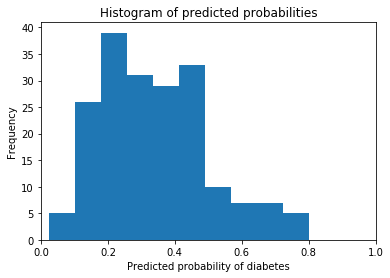

In [100]:
# histogram of predicted probabilities# histog 
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

### 8. Plot the ROC curve

**Question**: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer**: Plot the ROC curve!

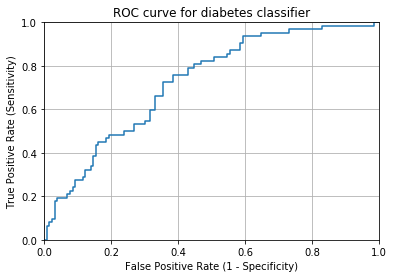

In [110]:
## Type Your Answer Below ##
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob,pos_label='1')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### 9. Print the AUC score

**1)**.AUC is useful as a **single number summary** of classifier performance.

**2)**. If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.

**3)**. AUC is useful even when there is **high class imbalance** (unlike classification accuracy).


In [111]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [112]:
evaluate_threshold(0.5)

('Sensitivity:', 0.24193548387096775)
('Specificity:', 0.90769230769230769)


In [117]:
## Type Your Answer Below ##
## IMPORTANT: first argument is true values, second argument is predicted probabilities ##
print(metrics.roc_auc_score(y_test, y_pred_prob))

ValueError: Data is not binary and pos_label is not specified

#### Calculate cross-validated AUC

In [ ]:
## Type Your Answer Below ##
#calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()